In [ ]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [2]:
import seaborn as sns
from sklearn import metrics

In [3]:
import numpy as np

In [4]:
np.random.seed(42)

In [5]:
import pandas as pd

In [ ]:
#genres consumption by different users per each time slot [0,96]
#each row represents user consumption at specific timestamp - day
#user_id, timestamp, time_0, time_1,...,time_96
# 1, 2015-03-07, Talk, Talk, ..., Western
# 1, 2015-05-04, -,-,..., Comedy
# 2, 2015-05-04, Talk, Talk, ..., Crime drama
df = pd.read_csv('step2/all_parts', header=None)

In [ ]:
df.head()

In [10]:
df = df.drop([0,1], axis=1)

In [11]:
genre_counts = df[3].value_counts()

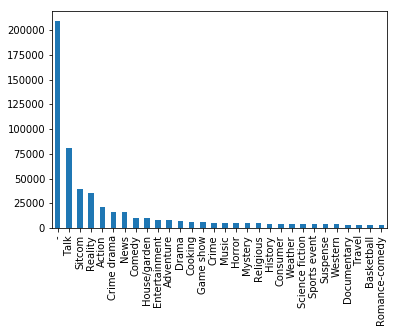

In [13]:
df[3].value_counts().head(30).plot.bar(x=df[3])

In [15]:
df.isnull().values.any()

False

In [16]:
#genre occurences per time
df_occur = df.apply(pd.Series.value_counts)

In [17]:
df_occur.head()

,2,3,4,5,6,7,8,9,10,11,...,88,89,90,91,92,93,94,95,96,97
-,203210.0,209359.0,209081.0,230952.0,227828.0,249685.0,238393.0,252113.0,245643.0,261637.0,...,159486.0,164246.0,164285.0,169084.0,177103.0,185156.0,187998.0,191253.0,193630.0,199144.0
Action,22824.0,21511.0,20979.0,20745.0,16529.0,16715.0,15922.0,15912.0,14746.0,14639.0,...,29129.0,29111.0,15759.0,15011.0,16107.0,16347.0,19185.0,18904.0,17600.0,18059.0
Action sports,26.0,24.0,17.0,18.0,55.0,55.0,53.0,53.0,47.0,46.0,...,41.0,49.0,8.0,8.0,14.0,14.0,12.0,10.0,12.0,12.0
Adults only,363.0,319.0,310.0,322.0,338.0,329.0,283.0,258.0,227.0,229.0,...,63.0,87.0,181.0,212.0,269.0,323.0,310.0,309.0,297.0,286.0
Adventure,7724.0,8147.0,7873.0,7797.0,7541.0,7369.0,7120.0,7086.0,4308.0,4306.0,...,10372.0,10317.0,9426.0,9692.0,8811.0,8745.0,8992.0,9518.0,9764.0,9718.0


In [ ]:
df_occur.isnull()

In [21]:
df_norm = df_occur.div(df_occur.sum(axis=1), axis=0)

In [22]:
df_norm.fillna(value=0,inplace = True)

In [23]:
df_norm.head()

,2,3,4,5,6,7,8,9,10,11,...,88,89,90,91,92,93,94,95,96,97
-,0.010980,0.011312,0.011297,0.012479,0.012310,0.013491,0.012881,0.013623,0.013273,0.014137,...,0.008618,0.008875,0.008877,0.009136,0.009570,0.010005,0.010158,0.010334,0.010463,0.010761
Action,0.014153,0.013338,0.013008,0.012863,0.010249,0.010364,0.009873,0.009867,0.009144,0.009077,...,0.018062,0.018051,0.009772,0.009308,0.009987,0.010136,0.011896,0.011722,0.010913,0.011198
Action sports,0.002481,0.002291,0.001622,0.001718,0.005249,0.005249,0.005058,0.005058,0.004486,0.004390,...,0.003913,0.004676,0.000764,0.000764,0.001336,0.001336,0.001145,0.000954,0.001145,0.001145
Adults only,0.046628,0.040976,0.039820,0.041362,0.043417,0.042261,0.036352,0.033141,0.029159,0.029416,...,0.008092,0.011175,0.023250,0.027232,0.034554,0.041490,0.039820,0.039692,0.038150,0.036737
Adventure,0.008056,0.008497,0.008211,0.008132,0.007865,0.007685,0.007426,0.007390,0.004493,0.004491,...,0.010817,0.010760,0.009831,0.010108,0.009189,0.009121,0.009378,0.009927,0.010183,0.010135


In [28]:
df_norm_t = df_norm.T

In [29]:
df_norm_t.isnull().values.any()

False

In [30]:
df_norm_t= df_norm_t.drop(['nogenre'], axis=1)

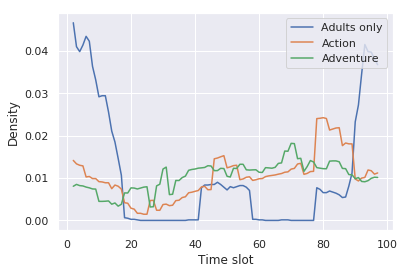

In [65]:
fig, ax = plt.subplots()

ax.plot(df_norm_t['Adults only'], label='Adults only')
ax.plot(df_norm_t['Action'],  label='Action')
ax.plot(df_norm_t['Adventure'],  label='Adventure')
legend = ax.legend(loc='upper right')
plt.xlabel("Time slot")
plt.ylabel("Density")
#legend.get_frame().set_facecolor('C0')
plt.show()
#plt.savefig("adventure_child_adults.PNG")

In [ ]:
df_norm_t[['Action','Adventure']]

In [ ]:
sklearn.metrics.mutual_info_score(df_norm_t.columns,df_norm_t.columns)

In [41]:
import scipy as sc

In [39]:
df_kl = pd.DataFrame(0, index=df_norm_t.columns, columns=df_norm_t.columns)
df_kl.head()

,-,Action,Action sports,Adults only,Adventure,Agriculture,Animals,Animated,Anthology,Archery,...,Technology,Tennis,Travel,Variety,Volleyball,War,Weather,Western,Wrestling,Yacht racing
-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adults only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_kl = pd.DataFrame(0.0, index=df_norm_t.columns, columns=df_norm_t.columns)
for column in df_norm_t:
    column1 = df_norm_t[column]
    column1_name = column
    #print(column1, column)
    for column in df_norm_t:
        column2 = df_norm_t[column]
        column2_name = column
        #print(column2, column)
        df_kl[column1_name][column2_name] = sc.stats.entropy(column1,column2,base=None)

In [ ]:
df_kl.head(80)

In [ ]:
df_kl.to_csv("./kl_div.csv")